In [1]:
!pip install -q catboost

     |████████████████████████████████| 76.6 MB 80 kB/s 


In [2]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

In [3]:
series = np.array([119., 127., 101., 116., 124., 134., 118.,  94.,  80.,  70.,  68.,
        92., 120.,  94., 100.,  98.,  78.,  97.,  94., 121., 130., 121.,
       139., 158.,  93.,  86., 101.,  90., 112., 121., 100., 117., 146.,
       170., 195., 188., 173., 181., 147., 202., 155., 181., 199., 210.,
       203., 222., 260., 255., 213., 153., 148., 133.])

In [4]:
actual = [297., 164., 201.,127.]

In [5]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

In [6]:
seq_length = 5

x, y = sliding_windows(series, seq_length)

In [7]:
x.shape, y.shape

((47, 5), (47,))

In [8]:
model = CatBoostRegressor()

In [9]:
model.fit(x, y)

Learning rate set to 0.025256
0:	learn: 48.5177481	total: 46.5ms	remaining: 46.5s
1:	learn: 48.0259916	total: 47.3ms	remaining: 23.6s
2:	learn: 47.5192649	total: 47.7ms	remaining: 15.8s
3:	learn: 47.0234402	total: 48ms	remaining: 12s
4:	learn: 46.3640037	total: 48.3ms	remaining: 9.62s
5:	learn: 45.7975516	total: 48.7ms	remaining: 8.06s
6:	learn: 45.3548751	total: 50.5ms	remaining: 7.17s
7:	learn: 44.9119897	total: 51.3ms	remaining: 6.36s
8:	learn: 44.4706556	total: 51.6ms	remaining: 5.68s
9:	learn: 43.9518375	total: 51.9ms	remaining: 5.14s
10:	learn: 43.4731006	total: 52.2ms	remaining: 4.7s
11:	learn: 43.0598477	total: 52.5ms	remaining: 4.33s
12:	learn: 42.5789483	total: 52.8ms	remaining: 4.01s
13:	learn: 42.1088147	total: 53.1ms	remaining: 3.74s
14:	learn: 41.6570080	total: 53.5ms	remaining: 3.51s
15:	learn: 41.2770884	total: 53.8ms	remaining: 3.31s
16:	learn: 40.8406497	total: 54.1ms	remaining: 3.13s
17:	learn: 40.4976279	total: 54.4ms	remaining: 2.97s
18:	learn: 40.0429156	total: 56

In [10]:
res = []
data = series.tolist()

for i in range(0, 4):
  test = np.array(data[-seq_length:])
  predict = model.predict(np.expand_dims(test, axis=0))
  res.append(predict.item())
  data.append(predict.tolist()[0])

In [11]:
res

[147.2359119788001, 143.67315020365692, 139.30038380325976, 146.20345847937767]

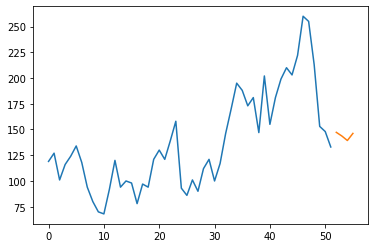

In [12]:
plt.plot(series)
plt.plot(np.arange(len(series), len(series) + 4), res)
plt.show()

In [13]:
result_df = pd.DataFrame({'Actual':actual,'Prediction':res})

In [14]:
result_df['difference'] = round(result_df['Actual'] - result_df['Prediction'], 2)
result_df['error-percentage'] = (result_df['difference'] / result_df['Actual']) * 100
result_df['error-percentage'] = result_df['error-percentage'].apply(lambda x: round(x, 2))

In [15]:
result_df

,Actual,Prediction,difference,error-percentage
0,297.0,147.235912,149.76,50.42
1,164.0,143.673150,20.33,12.40
2,201.0,139.300384,61.70,30.70
3,127.0,146.203458,-19.20,-15.12
